In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
import time

# Preprocessing for NN
from torch.utils.data import TensorDataset, DataLoader, Subset
import random

# NN
import torch
import torch.nn as nn
import torch.nn.functional as F
from pytorch_tabnet.tab_model import TabNetClassifier

from sklearn.model_selection import ParameterGrid, KFold, StratifiedKFold

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 6]

# define plt and sns styles
sns.set_style("whitegrid")
sns.set_palette("Set2")

In [3]:
df_train = pd.read_csv('data/obesity-processed.csv')
df_train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,MTRANS_Walking,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,Normal_Weight
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Normal_Weight
2,1,23.0,1.80,77.0,1,0,2.0,3.0,0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Normal_Weight
3,1,27.0,1.80,87.0,0,0,3.0,3.0,0,2.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Overweight_Level_I
4,1,22.0,1.78,89.8,0,0,2.0,1.0,0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Overweight_Level_II


In [4]:
label_encoder = LabelEncoder()
df_train['NObeyesdad'] = label_encoder.fit_transform(df_train['NObeyesdad'])
df_train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,MTRANS_Walking,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,0,2.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,6


In [5]:
# Splitting of the target column
X_train = df_train.drop(['NObeyesdad'], axis=1)
y_train = df_train['NObeyesdad']
X_train.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,MTRANS_Public_Transportation,MTRANS_Walking,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no
0,0,21.0,1.62,64.0,1,0,2.0,3.0,0,2.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,3.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,23.0,1.80,77.0,1,0,2.0,3.0,0,2.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,27.0,1.80,87.0,0,0,3.0,3.0,0,2.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,22.0,1.78,89.8,0,0,2.0,1.0,0,2.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


<Axes: >

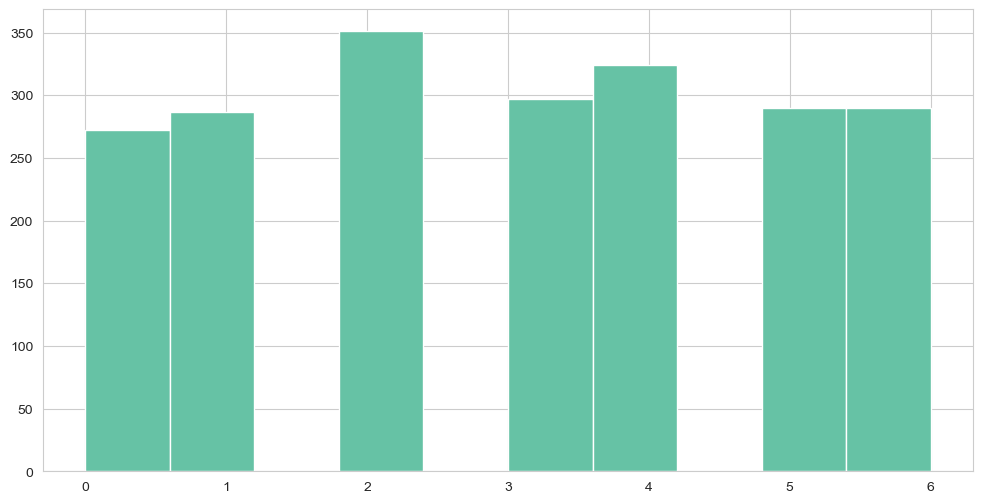

In [6]:
df_train.NObeyesdad.hist()

In [7]:
df_train.NObeyesdad.describe()

count    2111.000000
mean        3.015632
std         1.952090
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max         6.000000
Name: NObeyesdad, dtype: float64

In [8]:
# Splitting of the target column
X_train = df_train.drop(['NObeyesdad'], axis=1)
y_train = df_train['NObeyesdad']

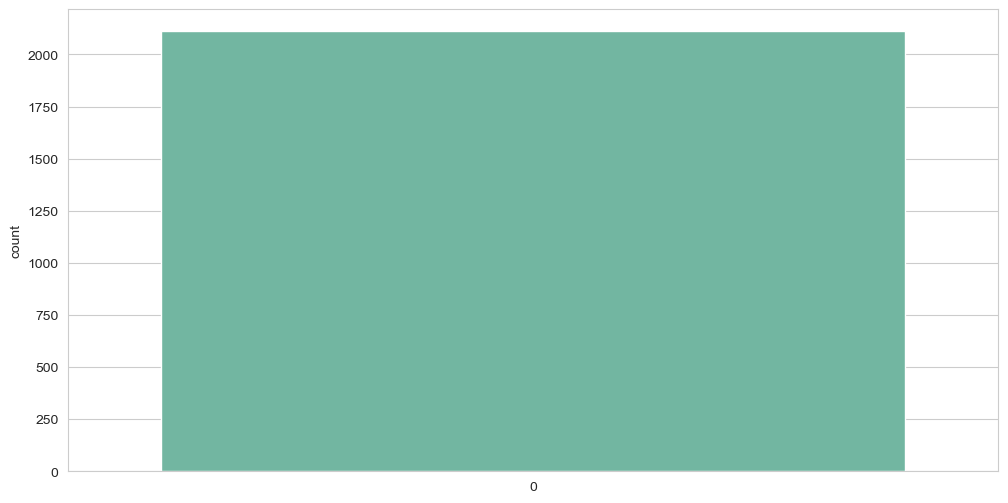

In [9]:
# plot the distribution of the target labels
sns.countplot(y_train)
plt.show()

In [10]:
features = X_train.to_numpy()
labels = y_train.to_numpy()

# Convert arrays to PyTorch tensors
features_tensor = torch.tensor(features, dtype=torch.float32)
labels_tensor = torch.tensor(labels, dtype=torch.float32)  # or torch.long for classification labels

# Create a TensorDataset and DataLoader for batching
dataset = TensorDataset(features_tensor, labels_tensor)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

## NN Implementation

In [11]:
# different activation functions, number of layers, number of neurons
class BasicNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(BasicNN, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.log_softmax(self.layer2(x), dim=1)
        return x

In [12]:
net = BasicNN(input_size=26, hidden_size=60, output_size=7)
print(net)

BasicNN(
  (layer1): Linear(in_features=26, out_features=60, bias=True)
  (layer2): Linear(in_features=60, out_features=7, bias=True)
)


In [13]:
criterion = nn.NLLLoss()
#criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)


In [14]:
num_epochs = 10

for epoch in range(num_epochs):
    for batch_features, batch_labels in dataloader:
        # Forward pass: Compute predicted y by passing x to the model
        pred_y = net(batch_features)

        # Compute and print loss
        loss = criterion(pred_y, batch_labels.long())  # labels should be of type long for NLLLoss

        # Zero gradients, perform a backward pass, and update the weights.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [15]:
# Calculate mse with train data
pred_y = net(features_tensor)
loss = criterion(pred_y, labels_tensor.long())
print(loss.item())

0.5168479084968567


In [16]:
_, predicted_labels = torch.max(pred_y, 1)
predicted_labels

tensor([6, 1, 6,  ..., 4, 4, 4])

##  Flexible NN approach

In [17]:
class FlexibleNN(nn.Module):
    def __init__(self, layer_sizes, activation_fn):
        super(FlexibleNN, self).__init__()
        self.layers = nn.ModuleList()
        for i in range(len(layer_sizes) - 1):
            self.layers.append(nn.Linear(layer_sizes[i], layer_sizes[i+1]))
        self.activation_fn = activation_fn

    def forward(self, x):
        for layer in self.layers[:-1]:  # Apply activation function to all but last layer
            x = self.activation_fn(layer(x))
        x = F.log_softmax(self.layers[-1](x), dim=1)  # Last layer with log softmax
        return x

In [18]:
def train_evaluate_model(params, train_loader, val_loader):
    net = FlexibleNN(layer_sizes=params['layer_sizes'], activation_fn=params['activation_fn'])
    criterion = nn.NLLLoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=params['lr'])

    num_epochs = 10
    all_losses = []

    for epoch in range(num_epochs):
        for batch_features, batch_labels in train_loader:
            pred_y = net(batch_features)
            loss = criterion(pred_y, batch_labels.long())

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Evaluate on validation set
        all_preds = []
        all_labels = []
        for batch_features, batch_labels in val_loader:
            pred_y = net(batch_features)
            all_preds.extend(pred_y.argmax(dim=1).tolist())
            all_labels.extend(batch_labels.tolist())

        # Store the loss for this fold
        all_losses.append(loss.item())

    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)
    recall = recall_score(all_labels, all_preds, average='macro', zero_division=0)
    f1 = f1_score(all_labels, all_preds, average='macro')
    # calculate a confusion matrix
    cm = confusion_matrix(all_labels, all_preds)

    # Return the average loss over all folds
    avg_loss = sum(all_losses) / len(all_losses)

    return (avg_loss, accuracy, precision, recall, f1), cm

In [19]:
parameters_grid = {
    'layer_sizes': [[26, 20, 10, 7], [26, 30, 10, 7], [26, 30, 20, 10, 7], [26, 40, 30, 20, 10, 7], [26, 50, 20, 10, 7], [26, 100, 50, 20, 10, 7], 
                    [26, 200, 100, 50, 20, 10, 7], [26, 300, 200, 100, 50, 20, 10, 7], [26, 400, 300, 200, 100, 50, 20, 10, 7], [26, 500, 400, 300, 200, 100, 50, 20, 10, 7]],
    'activation_fn': [F.relu, torch.tanh, torch.sigmoid],
    'lr': [0.001, 0.01, 0.1, 0.2, 0.3]
}

## Grid Search

In [20]:
full_start_time = time.time()
skf = StratifiedKFold(n_splits=5)
results = []

# Implementing grid search from scratch
for params in ParameterGrid(parameters_grid):
    all_metrics = []
    all_cm = []
    start_time = time.time()
    labels_np = np.array(labels)

    for train_idx, val_idx in skf.split(np.zeros(len(labels_np)), labels_np):
        train_loader = DataLoader(Subset(dataset, train_idx), batch_size=64)
        val_loader = DataLoader(Subset(dataset, val_idx), batch_size=64)
        metrics, cm = train_evaluate_model(params, train_loader, val_loader)
        all_metrics.append(metrics)
        all_cm.append(cm)

    params['activation_fn'] = params['activation_fn'].__name__

    avg_metrics = [sum(metric) / len(metric) for metric in zip(*all_metrics)]
    stacked_cm = np.stack(all_cm, axis=2)
    avg_cm = stacked_cm.mean(axis=2)
    elapsed_time = time.time() - start_time
    results.append({'params': params, 'loss': avg_metrics[0], 'accuracy': avg_metrics[1], 'precision': avg_metrics[2], 'recall': avg_metrics[3], 'f1': avg_metrics[4], 'time': elapsed_time, 'cm': avg_cm})

print("Total time elapsed:", time.time() - full_start_time)

# Saving the results in a DataFrame
df_results = pd.DataFrame(results)

Total time elapsed: 178.3815679550171


params       {'activation_fn': 'relu', 'layer_sizes': [26, ...
loss                                                  1.560337
accuracy                                              0.248695
precision                                             0.101009
recall                                                0.234838
f1                                                    0.134718
time                                                  0.650369
cm           [[0.0, 18.4, 18.6, 3.2, 2.2, 10.8, 1.2], [0.0,...
Name: 0, dtype: object
Best Loss: 1.5603367257118226
Best Params: {'activation_fn': 'relu', 'layer_sizes': [26, 20, 10, 7], 'lr': 0.001}


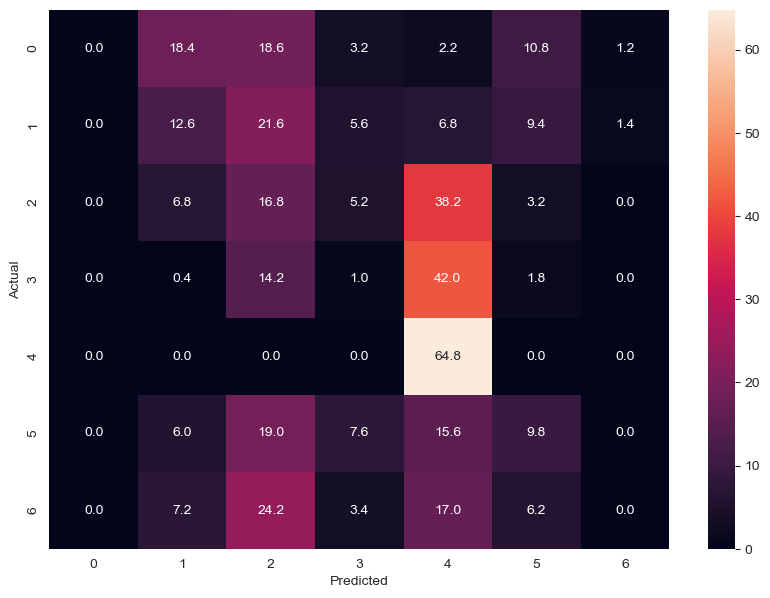

<Figure size 1200x600 with 0 Axes>

In [21]:
best_run = df_results.loc[df_results['loss'].idxmin()]
print(best_run)
print("Best Loss:", best_run['loss'])
print("Best Params:", best_run['params'])
plt.figure(figsize=(10,7))
sns.heatmap(best_run['cm'], annot=True, fmt=".1f")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
plt.savefig('obesity_confusion_matrix_grid_search_best.png')

## Random Search

In [22]:
def random_search_from_grid(parameters_grid, num_iterations, dataset):
    skf = StratifiedKFold(n_splits=5)
    results = []

    for _ in range(num_iterations):
        start_time = time.time()
        layer_sizes = random.choice(parameters_grid['layer_sizes'])
        activation_fn = random.choice(parameters_grid['activation_fn'])
        lr = random.choice(parameters_grid['lr'])

        params = {
            'layer_sizes': layer_sizes,
            'activation_fn': activation_fn,
            'lr': lr
        }

        all_metrics = []
        all_cm = []

        labels_np = np.array(labels)

        for train_idx, val_idx in skf.split(np.zeros(len(labels_np)), labels_np):
            train_loader = DataLoader(Subset(dataset, train_idx), batch_size=64)
            val_loader = DataLoader(Subset(dataset, val_idx), batch_size=64)
            metrics, cm = train_evaluate_model(params, train_loader, val_loader)
            all_metrics.append(metrics)
            all_cm.append(cm)

        params['activation_fn'] = params['activation_fn'].__name__

        avg_metrics = [sum(metric) / len(metric) for metric in zip(*all_metrics)]
        stacked_cm = np.stack(all_cm, axis=2)
        avg_cm = stacked_cm.mean(axis=2)


        elapsed_time = time.time() - start_time
        results.append({'params': params, 'loss': avg_metrics[0], 'accuracy': avg_metrics[1], 'precision': avg_metrics[2], 'recall': avg_metrics[3], 'f1': avg_metrics[4], 'time': elapsed_time, 'cm': avg_cm})

        print(f"Loss: {avg_metrics[0]}, Accuracy: {avg_metrics[1]}, Precision: {avg_metrics[2]}, Recall: {avg_metrics[3]}, F1: {avg_metrics[4]}, Params: {params}")

    df_results = pd.DataFrame(results)

    return df_results

full_start_time = time.time()
df_results_random = random_search_from_grid(parameters_grid, 50, dataset)
print(f"Total time: {time.time() - full_start_time}")

Loss: 2.314092330932617, Accuracy: 0.16627228216418496, Precision: 0.023753183166312135, Recall: 0.14285714285714285, F1: 0.04073333286216084, Params: {'layer_sizes': [26, 500, 400, 300, 200, 100, 50, 20, 10, 7], 'activation_fn': 'relu', 'lr': 0.3}
Loss: 2.3315613746643065, Accuracy: 0.16627228216418496, Precision: 0.023753183166312135, Recall: 0.14285714285714285, F1: 0.04073333286216084, Params: {'layer_sizes': [26, 100, 50, 20, 10, 7], 'activation_fn': 'relu', 'lr': 0.3}
Loss: 1.9244927382469175, Accuracy: 0.16627228216418496, Precision: 0.023753183166312135, Recall: 0.14285714285714285, F1: 0.04073333286216084, Params: {'layer_sizes': [26, 300, 200, 100, 50, 20, 10, 7], 'activation_fn': 'tanh', 'lr': 0.01}
Loss: 3.81158561706543, Accuracy: 0.16627228216418496, Precision: 0.023753183166312135, Recall: 0.14285714285714285, F1: 0.04073333286216084, Params: {'layer_sizes': [26, 50, 20, 10, 7], 'activation_fn': 'tanh', 'lr': 0.1}
Loss: 1.9023912525177002, Accuracy: 0.16627228216418496, 

params       {'layer_sizes': [26, 100, 50, 20, 10, 7], 'act...
loss                                                  1.741994
accuracy                                              0.188091
precision                                             0.048632
recall                                                0.185491
f1                                                    0.074741
time                                                   0.78685
cm           [[20.2, 0.0, 8.4, 1.6, 10.8, 11.0, 2.4], [15.8...
Name: 34, dtype: object
Best Loss: 1.741993625164032
Best Params: {'layer_sizes': [26, 100, 50, 20, 10, 7], 'activation_fn': 'relu', 'lr': 0.001}


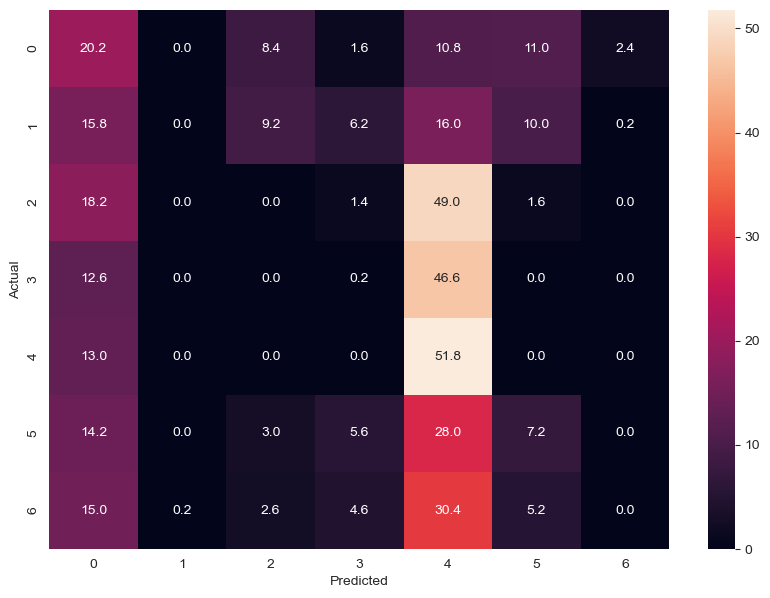

<Figure size 1200x600 with 0 Axes>

In [23]:
best_run = df_results_random.loc[df_results_random['loss'].idxmin()]
print(best_run)
print("Best Loss:", best_run['loss'])
print("Best Params:", best_run['params'])
plt.figure(figsize=(10,7))
sns.heatmap(best_run['cm'], annot=True, fmt=".1f")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
plt.savefig('obesity_confusion_matrix_random_search_best.png')

In [24]:
df_results_random.sort_values(by='loss', ascending=True, inplace=True)
df_results_random.head()

,params,loss,accuracy,precision,recall,f1,time,cm
34,"{'layer_sizes': [26, 100, 50, 20, 10, 7], 'act...",1.741994,0.188091,0.048632,0.185491,0.074741,0.786850,"[[20.2, 0.0, 8.4, 1.6, 10.8, 11.0, 2.4], [15.8..."
36,"{'layer_sizes': [26, 50, 20, 10, 7], 'activati...",1.765703,0.218833,0.131659,0.211301,0.122951,0.672563,"[[6.8, 0.0, 14.6, 2.2, 11.0, 17.2, 2.6], [1.2,..."
10,"{'layer_sizes': [26, 200, 100, 50, 20, 10, 7],...",1.788720,0.253950,0.124557,0.248523,0.129877,1.124614,"[[19.4, 13.0, 10.8, 0.0, 0.0, 0.0, 11.2], [13...."
26,"{'layer_sizes': [26, 30, 10, 7], 'activation_f...",1.811400,0.230256,0.116701,0.217180,0.114175,0.603509,"[[0.0, 16.0, 25.4, 7.4, 0.0, 0.0, 5.6], [0.0, ..."
8,"{'layer_sizes': [26, 300, 200, 100, 50, 20, 10...",1.882315,0.166272,0.023753,0.142857,0.040733,1.574919,"[[0.0, 0.0, 54.4, 0.0, 0.0, 0.0, 0.0], [0.0, 0..."


## Evaluation of Results

In [25]:
# save a copy of the results dataframe in another df
df_results_random_copy = df_results_random.copy()
df_results_copy = df_results.copy()

In [26]:
df_results_random = df_results_random_copy.copy()
df_results = df_results_copy.copy()

In [27]:
df_results['search_method'] = 'grid_search'
df_results_random['search_method'] = 'random_search'

df_results = pd.concat([df_results.drop(['params'], axis=1), df_results['params'].apply(pd.Series)], axis=1)

df_results_random = pd.concat([df_results_random.drop(['params'], axis=1), df_results_random['params'].apply(pd.Series)], axis=1)

df_result = pd.concat([df_results, df_results_random], axis=0)
df_result.head()

,loss,accuracy,precision,recall,f1,time,cm,search_method,activation_fn,layer_sizes,lr
0,1.560337,0.248695,0.101009,0.234838,0.134718,0.650369,"[[0.0, 18.4, 18.6, 3.2, 2.2, 10.8, 1.2], [0.0,...",grid_search,relu,"[26, 20, 10, 7]",0.001
1,1.857128,0.161533,0.023076,0.142857,0.039727,0.604779,"[[0.0, 0.0, 32.4, 0.0, 22.0, 0.0, 0.0], [0.0, ...",grid_search,relu,"[26, 20, 10, 7]",0.010
2,2.015258,0.166272,0.023753,0.142857,0.040733,0.606428,"[[0.0, 0.0, 54.4, 0.0, 0.0, 0.0, 0.0], [0.0, 0...",grid_search,relu,"[26, 20, 10, 7]",0.100
3,2.164455,0.166272,0.023753,0.142857,0.040733,0.595541,"[[0.0, 0.0, 54.4, 0.0, 0.0, 0.0, 0.0], [0.0, 0...",grid_search,relu,"[26, 20, 10, 7]",0.200
4,2.323696,0.166272,0.023753,0.142857,0.040733,0.601086,"[[0.0, 0.0, 54.4, 0.0, 0.0, 0.0, 0.0], [0.0, 0...",grid_search,relu,"[26, 20, 10, 7]",0.300


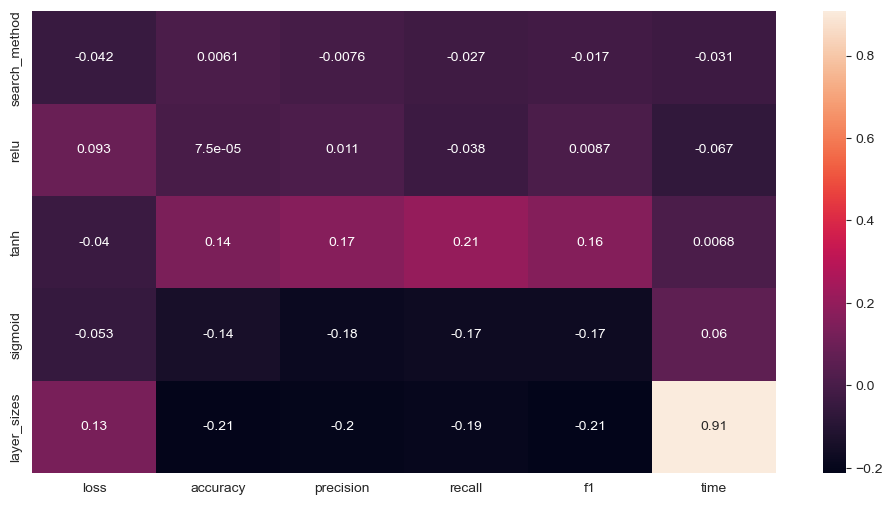

In [28]:
# mapping search
# 0: grid_search
# 1: random_search

# mapping activation_fn
# 0: relu
# 1: tanh
# 2: sigmoid

df_correlation = df_result.copy()

df_correlation.drop(['cm'], axis=1, inplace=True)

df_correlation['search_method'] = df_correlation['search_method'].map({'grid_search': 0, 'random_search': 1})
df_correlation['activation_fn'] = df_correlation['activation_fn'].map({'relu': 0, 'tanh': 1, 'sigmoid': 2})
df_correlation['layer_sizes'] = df_correlation['layer_sizes'].apply(lambda x: len(x))
df_correlation['relu'] = df_correlation['activation_fn'].apply(lambda x: 1 if x == 0 else 0)
df_correlation['tanh'] = df_correlation['activation_fn'].apply(lambda x: 1 if x == 1 else 0)
df_correlation['sigmoid'] = df_correlation['activation_fn'].apply(lambda x: 1 if x == 2 else 0)

corr = df_correlation.corr()

corr_subset = corr.loc[['search_method', 'relu' , 'tanh', 'sigmoid', 'layer_sizes'],
                       ['loss', 'accuracy', 'precision', 'recall', 'f1', 'time']]

# Create a heatmap of the subset
sns.heatmap(corr_subset, annot=True)
plt.show()
plt.show()

### Trade-off between metrics

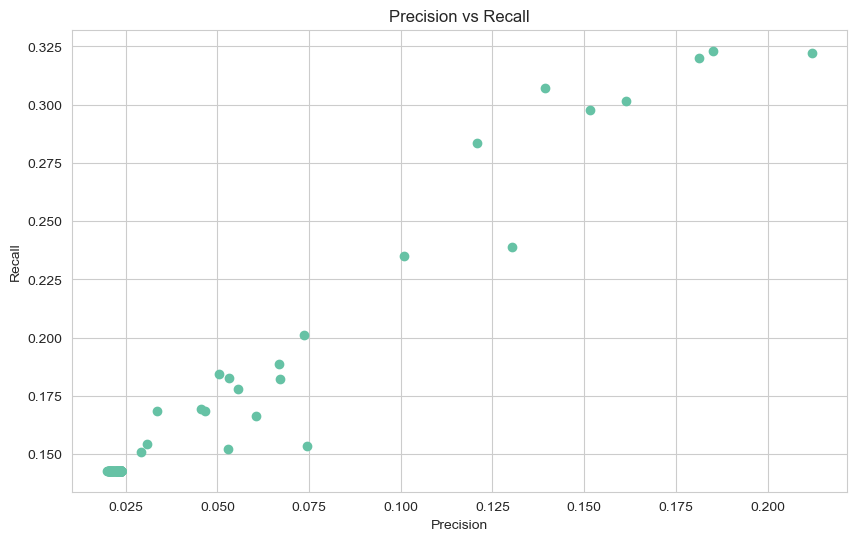

<Figure size 1200x600 with 0 Axes>

In [29]:
# Usually higher precision comes at the cost of lower recall and vice versa, 
# but in this case we can see that the model with the highest precision also has the highest recall. 
# This is because the model with the highest precision and recall is the model with the highest accuracy, 
# which is the model with the highest F1 score. This means that the model with the highest F1 score is the best model.

plt.figure(figsize=(10, 6))
plt.scatter(df_results['precision'], df_results['recall'])
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision vs Recall')
plt.show()
plt.savefig('obesity_precision_vs_recall_grid_search.png')

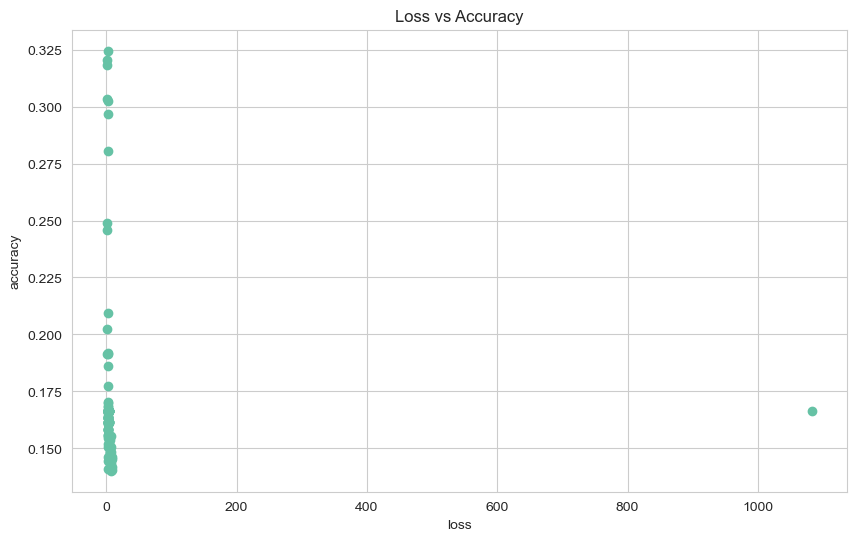

<Figure size 1200x600 with 0 Axes>

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(df_results['loss'], df_results['accuracy'])
plt.xlabel('loss')
plt.ylabel('accuracy')
plt.title('Loss vs Accuracy')
plt.show()
plt.savefig('obesity_loss_vs_accuracy.png')

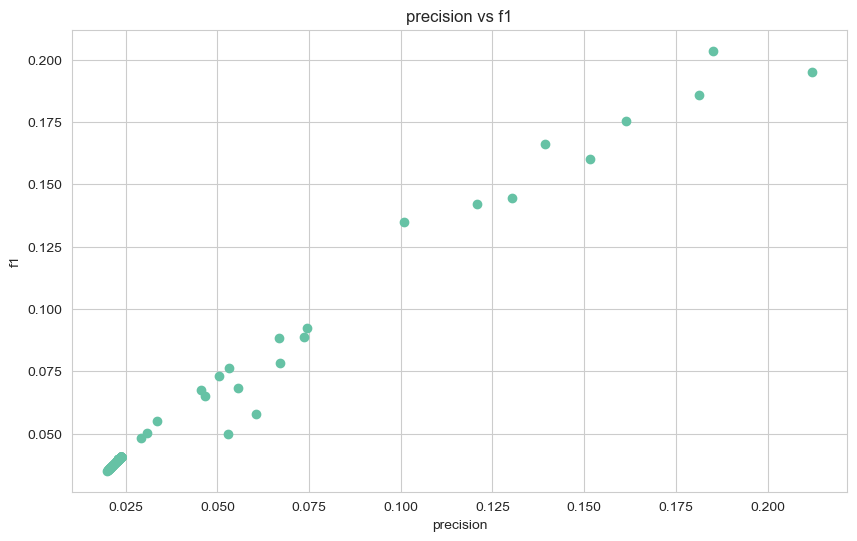

<Figure size 1200x600 with 0 Axes>

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(df_results['precision'], df_results['f1'])
plt.xlabel('precision')
plt.ylabel('f1')
plt.title('precision vs f1')
plt.show()
plt.savefig('obesity_precision_vs_f1.png')

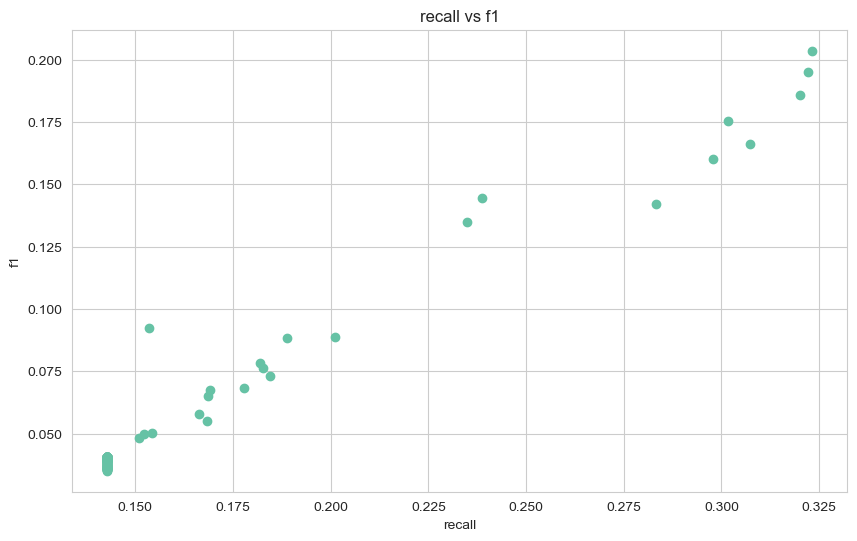

<Figure size 1200x600 with 0 Axes>

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(df_results['recall'], df_results['f1'])
plt.xlabel('recall')
plt.ylabel('f1')
plt.title('recall vs f1')
plt.show()
plt.savefig('obesity_recall_vs_f1.png')

### Logistic Regression

In [33]:
def train_evaluate_logistic_regression(train_features, train_labels, val_features, val_labels):
    model = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)
    model.fit(train_features, train_labels)
   
    #Predictions on the validation set
    predictions = model.predict(val_features)
   
    #Evaluation metrics
    accuracy = accuracy_score(val_labels, predictions)
    precision = precision_score(val_labels, predictions, average='macro', zero_division=0)
    recall = recall_score(val_labels, predictions, average='macro', zero_division=0)
    f1 = f1_score(val_labels, predictions, average='macro')
    cm = confusion_matrix(val_labels, predictions)
   
    return accuracy, precision, recall, f1, cm

lr_metrics = []

#Create a StratifiedKFold object
skf = StratifiedKFold(n_splits=5)

# Initialize the results DataFrame
results = pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1", "Runtime"])

for fold, (train_index, val_index) in enumerate(skf.split(features, labels)):
    X_train, X_val = features[train_index], features[val_index]
    y_train, y_val = labels[train_index], labels[val_index]

    #Train and evaluate the logistic regression classifier
    start_time = time.time()
    lr_accuracy, lr_precision, lr_recall, lr_f1, lr_cm = train_evaluate_logistic_regression(X_train, y_train, X_val, y_val)
    end_time = time.time()
    runtime = end_time - start_time

    #Results
    results.loc[fold] = [lr_accuracy, lr_precision, lr_recall, lr_f1, runtime]
    lr_metrics.append([lr_accuracy, lr_precision, lr_recall, lr_f1])
    
print("Default Logistic Regression Results:")
print(results)

Default Logistic Regression Results:
   Accuracy  Precision    Recall        F1   Runtime
0  0.560284   0.563896  0.559252  0.545508  0.051896
1  0.770142   0.771134  0.766870  0.755470  0.032669
2  0.751185   0.749659  0.749736  0.734263  0.026224
3  0.753555   0.771626  0.752430  0.751741  0.026126
4  0.763033   0.780389  0.762019  0.750476  0.025387


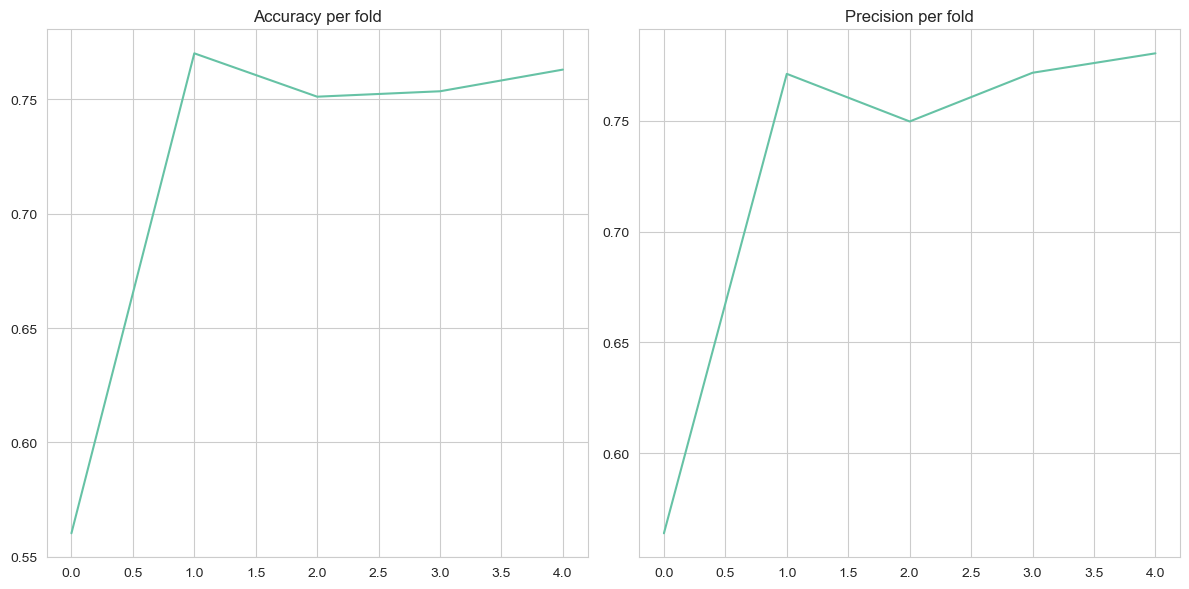

In [34]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(results.index, results['Accuracy'], label='Accuracy')
plt.title('Accuracy per fold')

plt.subplot(1, 2, 2)
plt.plot(results.index, results['Precision'], label='Precision')
plt.title('Precision per fold')

plt.tight_layout()
plt.show()

In [35]:
avg_lr_metrics = np.mean(lr_metrics, axis=0)
# Display average metrics
print("Average Metrics for Logistic Regression:")
print("Accuracy:", avg_lr_metrics[0])
print("Precision:", avg_lr_metrics[1])
print("Recall:", avg_lr_metrics[2])
print("F1 Score:", avg_lr_metrics[3])

Average Metrics for Logistic Regression:
Accuracy: 0.7196396759772781
Precision: 0.7273408671436418
Recall: 0.7180613418163949
F1 Score: 0.7074914462691149


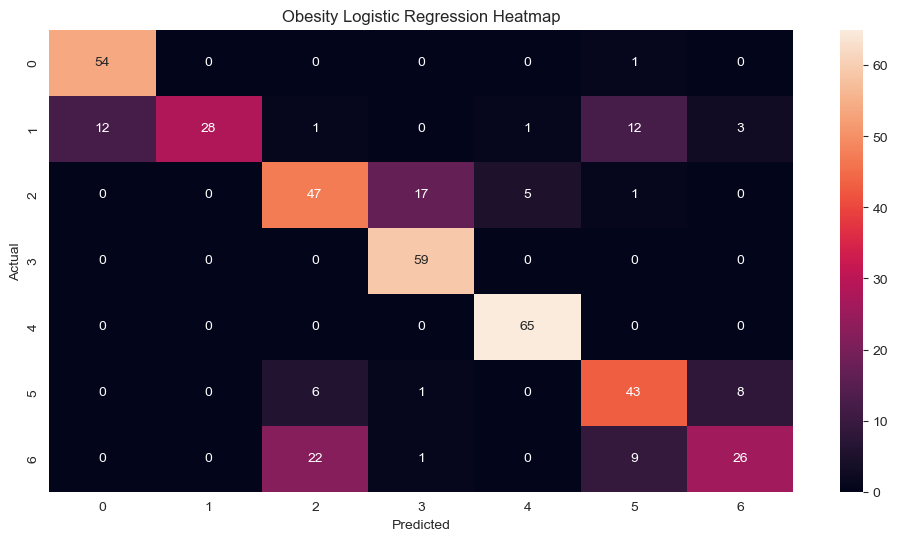

<Figure size 1200x600 with 0 Axes>

In [36]:
sns.heatmap(lr_cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Obesity Logistic Regression Heatmap')
plt.show()
plt.savefig('obesity_lr_confusion.png')

### TabNet model

In [39]:
X = df_train.drop(['NObeyesdad'], axis=1)
y = df_train['NObeyesdad']

def evaluate_model(model, X_val, y_val):
    all_preds = []
    all_labels = []
    pred_y = model.predict(X_val)
    all_preds.extend(pred_y.tolist()) # Change this line
    all_labels.extend(y_val.tolist())
    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)
    recall = recall_score(all_labels, all_preds, average='macro', zero_division=0)
    f1 = f1_score(all_labels, all_preds, average='macro')
    cm = confusion_matrix(all_labels, all_preds)
    return accuracy, precision, recall, f1, cm

tabnet_metrics = []

skf = StratifiedKFold(n_splits=5)

#Initialize the results DataFrame
results = pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1", "Runtime"])

for fold, (train_index, val_index) in enumerate(skf.split(X, y)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

#Convert Pandas DataFrames to NumPy arrays
    X_train = X_train.to_numpy()
    X_val = X_val.to_numpy()
    y_train = y_train.to_numpy()
    y_val = y_val.to_numpy()
 

 #Train model
    start_time = time.time()
    tabnet = TabNetClassifier()
    tabnet.fit(X_train, y_train)
    end_time = time.time()
    runtime = end_time - start_time

 #Train and evaluate
    tabnet_accuracy, tabnet_precision, tabnet_recall, tabnet_f1 = evaluate_model(tabnet, X_val, y_val)[:4]
    tabnet_cm = confusion_matrix(y_val, tabnet.predict(X_val))

    results.loc[fold] = [tabnet_accuracy, tabnet_precision, tabnet_recall, tabnet_f1, runtime]
    tabnet_metrics.append([tabnet_accuracy, tabnet_precision, tabnet_recall, tabnet_f1])

avg_tabnet_metrics = np.mean(tabnet_metrics, axis=0)

/Users/gretagyori/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/Users/gretagyori/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 2.71766 |  0:00:00s
epoch 1  | loss: 2.42658 |  0:00:00s
epoch 2  | loss: 2.18524 |  0:00:00s
epoch 3  | loss: 2.01108 |  0:00:00s
epoch 4  | loss: 1.9302  |  0:00:00s
epoch 5  | loss: 1.89015 |  0:00:00s
epoch 6  | loss: 1.78786 |  0:00:00s
epoch 7  | loss: 1.77237 |  0:00:00s
epoch 8  | loss: 1.73354 |  0:00:00s
epoch 9  | loss: 1.71876 |  0:00:00s
epoch 10 | loss: 1.67312 |  0:00:00s
epoch 11 | loss: 1.66215 |  0:00:00s
epoch 12 | loss: 1.61757 |  0:00:00s
epoch 13 | loss: 1.60302 |  0:00:00s
epoch 14 | loss: 1.55181 |  0:00:00s
epoch 15 | loss: 1.52784 |  0:00:00s
epoch 16 | loss: 1.50105 |  0:00:00s
epoch 17 | loss: 1.42988 |  0:00:00s
epoch 18 | loss: 1.42939 |  0:00:00s
epoch 19 | loss: 1.29752 |  0:00:01s
epoch 20 | loss: 1.22785 |  0:00:01s
epoch 21 | loss: 1.19143 |  0:00:01s
epoch 22 | loss: 1.17244 |  0:00:01s
epoch 23 | loss: 1.1477  |  0:00:01s
epoch 24 | loss: 1.14332 |  0:00:01s
epoch 25 | loss: 1.0641  |  0:00:01s
epoch 26 | loss: 1.01871 |  0:00:01s
e

/Users/gretagyori/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/Users/gretagyori/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 2.70375 |  0:00:00s
epoch 1  | loss: 2.4672  |  0:00:00s
epoch 2  | loss: 2.23656 |  0:00:00s
epoch 3  | loss: 2.04715 |  0:00:00s
epoch 4  | loss: 1.97392 |  0:00:00s
epoch 5  | loss: 1.90554 |  0:00:00s
epoch 6  | loss: 1.82285 |  0:00:00s
epoch 7  | loss: 1.82091 |  0:00:00s
epoch 8  | loss: 1.79195 |  0:00:00s
epoch 9  | loss: 1.76248 |  0:00:00s
epoch 10 | loss: 1.68468 |  0:00:00s
epoch 11 | loss: 1.6938  |  0:00:00s
epoch 12 | loss: 1.62215 |  0:00:00s
epoch 13 | loss: 1.60611 |  0:00:00s
epoch 14 | loss: 1.56393 |  0:00:00s
epoch 15 | loss: 1.54496 |  0:00:00s
epoch 16 | loss: 1.48282 |  0:00:00s
epoch 17 | loss: 1.45131 |  0:00:00s
epoch 18 | loss: 1.39491 |  0:00:00s
epoch 19 | loss: 1.38039 |  0:00:00s
epoch 20 | loss: 1.33226 |  0:00:01s
epoch 21 | loss: 1.30008 |  0:00:01s
epoch 22 | loss: 1.25366 |  0:00:01s
epoch 23 | loss: 1.18421 |  0:00:01s
epoch 24 | loss: 1.17076 |  0:00:01s
epoch 25 | loss: 1.1035  |  0:00:01s
epoch 26 | loss: 1.07538 |  0:00:01s
e

/Users/gretagyori/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/Users/gretagyori/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 2.77355 |  0:00:00s
epoch 1  | loss: 2.439   |  0:00:00s
epoch 2  | loss: 2.16037 |  0:00:00s
epoch 3  | loss: 2.00524 |  0:00:00s
epoch 4  | loss: 1.96379 |  0:00:00s
epoch 5  | loss: 1.91882 |  0:00:00s
epoch 6  | loss: 1.88885 |  0:00:00s
epoch 7  | loss: 1.87486 |  0:00:00s
epoch 8  | loss: 1.83183 |  0:00:00s
epoch 9  | loss: 1.82119 |  0:00:00s
epoch 10 | loss: 1.78275 |  0:00:00s
epoch 11 | loss: 1.76593 |  0:00:00s
epoch 12 | loss: 1.72305 |  0:00:00s
epoch 13 | loss: 1.7107  |  0:00:00s
epoch 14 | loss: 1.65526 |  0:00:00s
epoch 15 | loss: 1.65109 |  0:00:00s
epoch 16 | loss: 1.59668 |  0:00:00s
epoch 17 | loss: 1.54818 |  0:00:00s
epoch 18 | loss: 1.47431 |  0:00:00s
epoch 19 | loss: 1.42725 |  0:00:00s
epoch 20 | loss: 1.38301 |  0:00:01s
epoch 21 | loss: 1.36346 |  0:00:01s
epoch 22 | loss: 1.29009 |  0:00:01s
epoch 23 | loss: 1.22403 |  0:00:01s
epoch 24 | loss: 1.17757 |  0:00:01s
epoch 25 | loss: 1.14954 |  0:00:01s
epoch 26 | loss: 1.0705  |  0:00:01s
e

/Users/gretagyori/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/Users/gretagyori/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 3  | loss: 2.05096 |  0:00:00s
epoch 4  | loss: 1.92167 |  0:00:00s
epoch 5  | loss: 1.88729 |  0:00:00s
epoch 6  | loss: 1.85116 |  0:00:00s
epoch 7  | loss: 1.83411 |  0:00:00s
epoch 8  | loss: 1.81074 |  0:00:00s
epoch 9  | loss: 1.79784 |  0:00:00s
epoch 10 | loss: 1.73474 |  0:00:00s
epoch 11 | loss: 1.73021 |  0:00:00s
epoch 12 | loss: 1.65631 |  0:00:00s
epoch 13 | loss: 1.64915 |  0:00:00s
epoch 14 | loss: 1.61798 |  0:00:00s
epoch 15 | loss: 1.53519 |  0:00:00s
epoch 16 | loss: 1.52064 |  0:00:00s
epoch 17 | loss: 1.4202  |  0:00:00s
epoch 18 | loss: 1.39699 |  0:00:00s
epoch 19 | loss: 1.3757  |  0:00:00s
epoch 20 | loss: 1.35638 |  0:00:01s
epoch 21 | loss: 1.30144 |  0:00:01s
epoch 22 | loss: 1.24623 |  0:00:01s
epoch 23 | loss: 1.22264 |  0:00:01s
epoch 24 | loss: 1.196   |  0:00:01s
epoch 25 | loss: 1.13256 |  0:00:01s
epoch 26 | loss: 1.12719 |  0:00:01s
epoch 27 | loss: 1.08296 |  0:00:01s
epoch 28 | loss: 1.06912 |  0:00:01s
epoch 29 | loss: 1.02747 |  0:00:01s
e

/Users/gretagyori/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/Users/gretagyori/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 2  | loss: 2.16467 |  0:00:00s
epoch 3  | loss: 2.00754 |  0:00:00s
epoch 4  | loss: 1.91086 |  0:00:00s
epoch 5  | loss: 1.85837 |  0:00:00s
epoch 6  | loss: 1.79862 |  0:00:00s
epoch 7  | loss: 1.76812 |  0:00:00s
epoch 8  | loss: 1.72016 |  0:00:00s
epoch 9  | loss: 1.65917 |  0:00:00s
epoch 10 | loss: 1.63669 |  0:00:00s
epoch 11 | loss: 1.58471 |  0:00:00s
epoch 12 | loss: 1.54723 |  0:00:00s
epoch 13 | loss: 1.47371 |  0:00:00s
epoch 14 | loss: 1.45182 |  0:00:00s
epoch 15 | loss: 1.45259 |  0:00:00s
epoch 16 | loss: 1.4105  |  0:00:00s
epoch 17 | loss: 1.32812 |  0:00:00s
epoch 18 | loss: 1.34682 |  0:00:00s
epoch 19 | loss: 1.28059 |  0:00:00s
epoch 20 | loss: 1.29947 |  0:00:01s
epoch 21 | loss: 1.23564 |  0:00:01s
epoch 22 | loss: 1.1762  |  0:00:01s
epoch 23 | loss: 1.18349 |  0:00:01s
epoch 24 | loss: 1.13504 |  0:00:01s
epoch 25 | loss: 1.09097 |  0:00:01s
epoch 26 | loss: 1.02609 |  0:00:01s
epoch 27 | loss: 1.01573 |  0:00:01s
epoch 28 | loss: 0.96365 |  0:00:01s
e

In [40]:
# Print the results
print("\nAverage Metrics for TabNet:")
print("Accuracy:", avg_tabnet_metrics[0])
print("Precision:", avg_tabnet_metrics[1])
print("Recall:", avg_tabnet_metrics[2])
print("F1 Score:", avg_tabnet_metrics[3])
print("Confusion Matrix:\n", tabnet_cm)


Average Metrics for TabNet:
Accuracy: 0.23548003988661445
Precision: 0.18022020379042353
Recall: 0.23042642020371956
F1 Score: 0.16408829370945857
Confusion Matrix:
 [[ 0 14  0  0  0 30 11]
 [ 0  3 21 10  0  9 14]
 [ 0  0  0 66  4  0  0]
 [ 0  0  0 35 24  0  0]
 [ 0  0  0  0 65  0  0]
 [ 0  0 13 40  2  0  3]
 [ 0  0 15 43  0  0  0]]


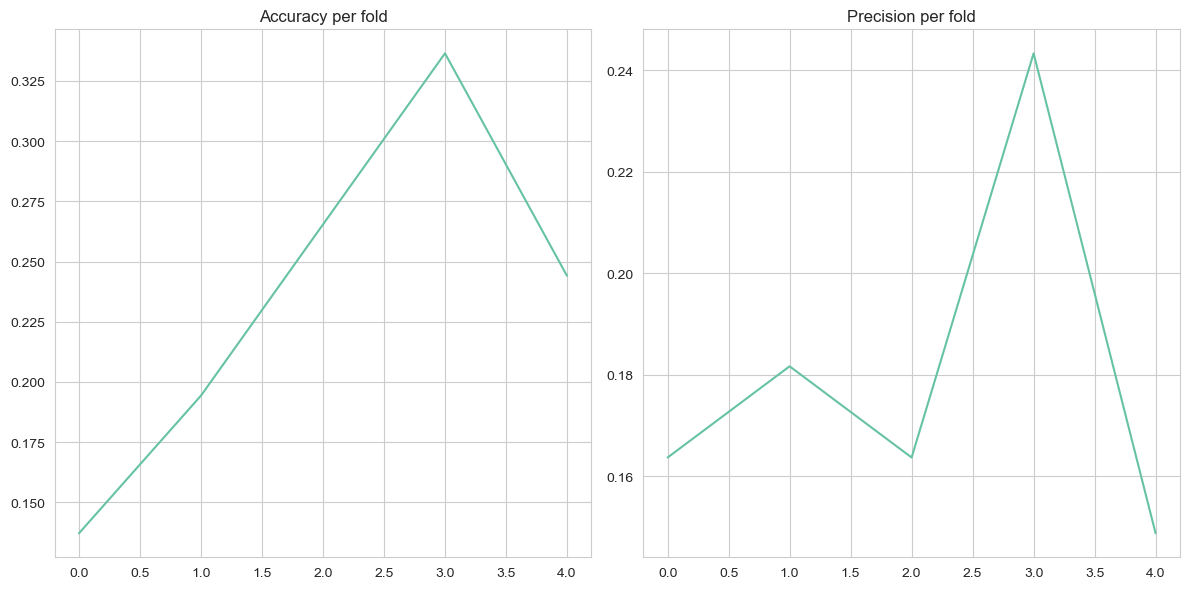

In [41]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(results.index, results['Accuracy'], label='Accuracy')
plt.title('Accuracy per fold')

plt.subplot(1, 2, 2)
plt.plot(results.index, results['Precision'], label='Precision')
plt.title('Precision per fold')

plt.tight_layout()
plt.show()

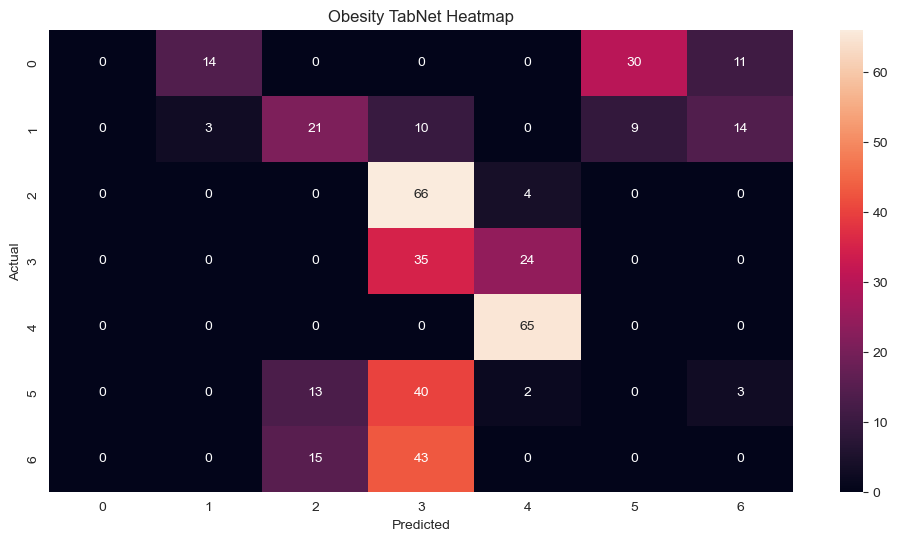

<Figure size 1200x600 with 0 Axes>

In [42]:
sns.heatmap(tabnet_cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Obesity TabNet Heatmap')
plt.show()
plt.savefig('Obesity_tabnet_confusion.png')

### Overall comparison

In [43]:
all_metrics = []

lr_metrics = ['Logistic Regression'] + avg_lr_metrics.tolist()
all_metrics.append(lr_metrics)

tabnet_metrics = ['TabNet'] + avg_tabnet_metrics.tolist()
all_metrics.append(tabnet_metrics)

grid_search_metrics = ['Grid Search'] + df_results.sort_values(by='loss').head(1).values.tolist()[0][1:5]
all_metrics.append(grid_search_metrics)

random_search_metrics = ['Random Search'] + df_results_random.sort_values(by='loss').head(1).values.tolist()[0][1:5]
all_metrics.append(random_search_metrics)

columns = ['Implementation', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
df_all_metrics = pd.DataFrame(all_metrics, columns=columns)

print(df_all_metrics)

        Implementation  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.719640   0.727341  0.718061  0.707491
1               TabNet  0.235480   0.180220  0.230426  0.164088
2          Grid Search  0.248695   0.101009  0.234838  0.134718
3        Random Search  0.188091   0.048632  0.185491  0.074741


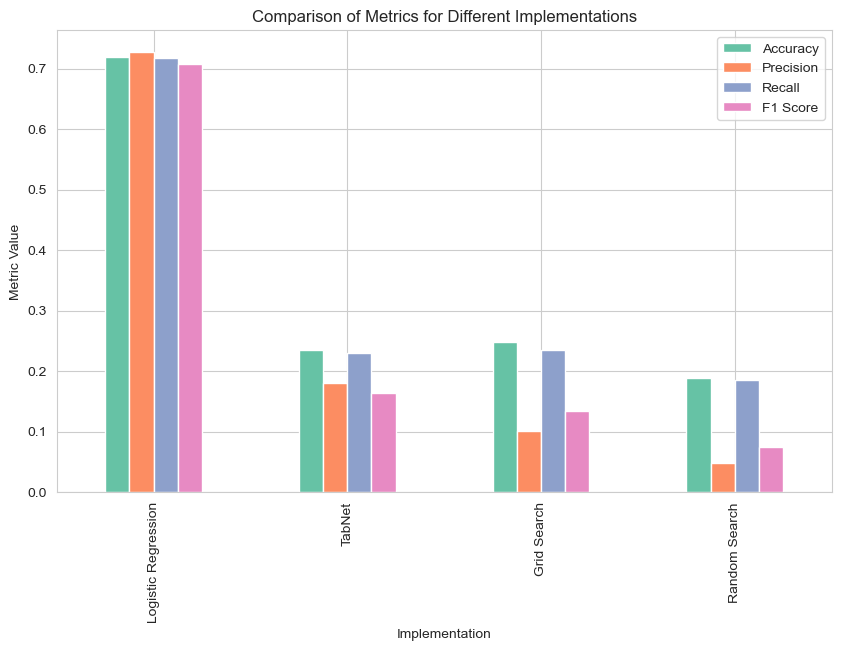

<Figure size 1200x600 with 0 Axes>

In [44]:
df_all_metrics.set_index('Implementation', inplace=True)

df_all_metrics.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Metrics for Different Implementations')
plt.ylabel('Metric Value')
plt.xlabel('Implementation')
plt.show()
plt.savefig('obesity_all_barplot.png')

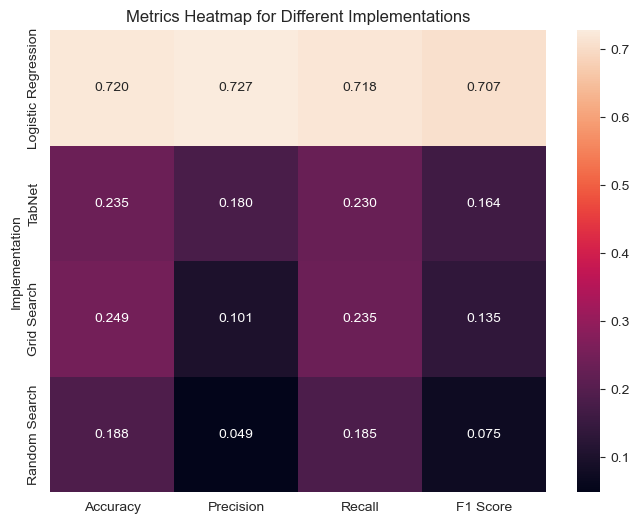

<Figure size 1200x600 with 0 Axes>

In [45]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_all_metrics, annot=True, fmt=".3f")
plt.title('Metrics Heatmap for Different Implementations')
plt.show()
plt.savefig('obesity_all_heatmap.png')